In [1]:
from numpy.random import randn
import numpy as np
np.random.seed(123)
from plotly.offline import iplot
import cufflinks as cf
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [2]:
cf.go_offline()

In [3]:
path = "datasets/bitly_usagov/example.txt"

In [4]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [5]:
import json
records = [json.loads(line) for line in open(path)]

In [6]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [7]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [8]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [9]:
len(time_zones)

3440

In [10]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [11]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) 
    for x in sequence:
        counts[x] += 1
    return counts

In [12]:
counts = get_counts(time_zones)

In [13]:
import itertools
dict(itertools.islice(counts.items(), 10))

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35}

In [14]:
counts["America/New_York"]

1251

In [15]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [16]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [17]:
from collections import Counter
counts = Counter(time_zones)

In [18]:
type(counts)

collections.Counter

In [19]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [20]:
frame = pd.DataFrame(records)
frame.head(4)

a  \
0  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) C...   
1                                                           GoogleMaps/RochesterNY   
2  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2...   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.52.7 (KHTML, ...   

    c   nk                 tz  gr       g       h         l              al  \
0  US  1.0   America/New_York  MA  A6qOVH  wfLQtf   orofrog  en-US,en;q=0.8   
1  US  0.0     America/Denver  UT  mwszkS  mwszkS     bitly             NaN   
2  US  1.0   America/New_York  DC  xxr3Qb  xxr3Qb     bitly           en-US   
3  BR  0.0  America/Sao_Paulo  27  zCaLwp  zUtuOu  alelex88           pt-br   

          hh                                                     r  \
0  1.usa.gov  http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf   
1       j.mp                              http://www.AwareMap.com/   
2  1.usa.gov                                  http://t.co/03elZC4Q   
3  1.usa.gov                                                direct   

                                                      u             t  \
0           http://www.ncbi.nlm.nih.gov/pubmed/22415991  1.331923e+09   
1           http://www.monroecounty.gov/etc/911/rss.php  1.331923e+09   
2  http://boxer.senate.gov/en/press/releases/031612.cfm  1.331923e+09   
3               http://apod.nasa.gov/apod/ap120312.html  1.331923e+09   

             hc          cy                        ll  _heartbeat_   kw  
0  1.331823e+09     Danvers   [42.576698, -70.954903]          NaN  NaN  
1  1.308262e+09       Provo  [40.218102, -111.613297]          NaN  NaN  
2  1.331920e+09  Washington     [38.9007, -77.043098]          NaN  NaN  
3  1.331923e+09        Braz  [-23.549999, -46.616699]          NaN  NaN

In [21]:
type(records)

list

In [22]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [23]:
frame["tz"][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [24]:
tz_counts = frame["tz"].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [25]:
type(tz_counts)

pandas.core.series.Series

In [26]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [27]:
clean_tz[clean_tz == ""] = "Unknown"
clean_tz[:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7              Unknown
8              Unknown
9              Unknown
Name: tz, dtype: object

In [28]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [29]:
import seaborn as sns
subset = tz_counts[:10]

In [30]:
subset

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<AxesSubplot:>

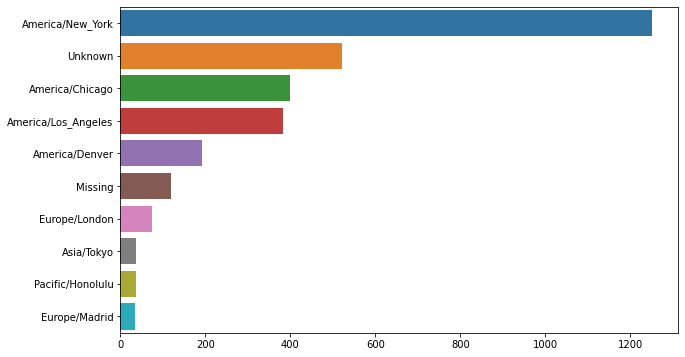

In [31]:
sns.barplot(y=subset.index, x=subset.values)

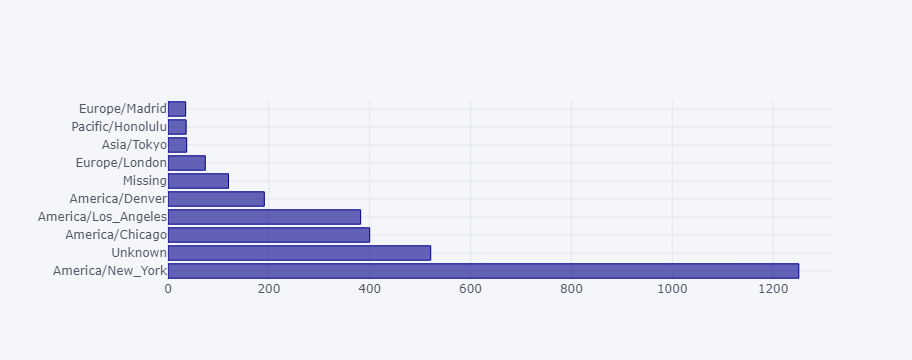

In [32]:
subset.iplot(kind='barh', colors="darkblue")

In [33]:
frame["a"][1]

'GoogleMaps/RochesterNY'

In [34]:
frame["a"][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [35]:
frame["a"][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [36]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [37]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [38]:
cframe = frame[frame["a"].notna()].copy()
len(frame), len(cframe)

(3560, 3440)

In [39]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [40]:
by_tz_os = cframe.groupby(["tz", "os"])
by_tz_os

In [41]:
by_tz_os.size()

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [42]:
by_tz_os.size().unstack()

os                   Not Windows  Windows
tz                                       
                           245.0    276.0
Africa/Cairo                 NaN      3.0
Africa/Casablanca            NaN      1.0
Africa/Ceuta                 NaN      2.0
Africa/Johannesburg          NaN      1.0
...                          ...      ...
Europe/Volgograd             NaN      1.0
Europe/Warsaw                1.0     15.0
Europe/Zurich                4.0      NaN
Pacific/Auckland             3.0      8.0
Pacific/Honolulu             NaN     36.0

[97 rows x 2 columns]

In [43]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head(10)

os                              Not Windows  Windows
tz                                                  
                                      245.0    276.0
Africa/Cairo                            0.0      3.0
Africa/Casablanca                       0.0      1.0
Africa/Ceuta                            0.0      2.0
Africa/Johannesburg                     0.0      1.0
Africa/Lusaka                           0.0      1.0
America/Anchorage                       4.0      1.0
America/Argentina/Buenos_Aires          1.0      0.0
America/Argentina/Cordoba               0.0      1.0
America/Argentina/Mendoza               0.0      1.0

In [44]:
agg_counts.sum("columns")

tz
                       521.0
Africa/Cairo             3.0
Africa/Casablanca        1.0
Africa/Ceuta             2.0
Africa/Johannesburg      1.0
                       ...  
Europe/Volgograd         1.0
Europe/Warsaw           16.0
Europe/Zurich            4.0
Pacific/Auckland        11.0
Pacific/Honolulu        36.0
Length: 97, dtype: float64

In [45]:
indexer = agg_counts.sum("columns").argsort()
indexer

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [46]:
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

In [47]:
indexer[-10:]

tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [48]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os                   Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
                           245.0    276.0
America/New_York           339.0    912.0

In [49]:
agg_counts.sum(axis="columns")

tz
                       521.0
Africa/Cairo             3.0
Africa/Casablanca        1.0
Africa/Ceuta             2.0
Africa/Johannesburg      1.0
                       ...  
Europe/Volgograd         1.0
Europe/Warsaw           16.0
Europe/Zurich            4.0
Pacific/Auckland        11.0
Pacific/Honolulu        36.0
Length: 97, dtype: float64

In [50]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [51]:
count_subset = count_subset.stack()
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

In [52]:
count_subset.name = "total"
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
Name: total, dtype: float64

In [53]:
count_subset = count_subset.reset_index()
count_subset.head(10)

tz           os  total
0  America/Sao_Paulo  Not Windows   13.0
1  America/Sao_Paulo      Windows   20.0
2      Europe/Madrid  Not Windows   16.0
3      Europe/Madrid      Windows   19.0
4   Pacific/Honolulu  Not Windows    0.0
5   Pacific/Honolulu      Windows   36.0
6         Asia/Tokyo  Not Windows    2.0
7         Asia/Tokyo      Windows   35.0
8      Europe/London  Not Windows   43.0
9      Europe/London      Windows   31.0

<AxesSubplot:xlabel='total', ylabel='tz'>

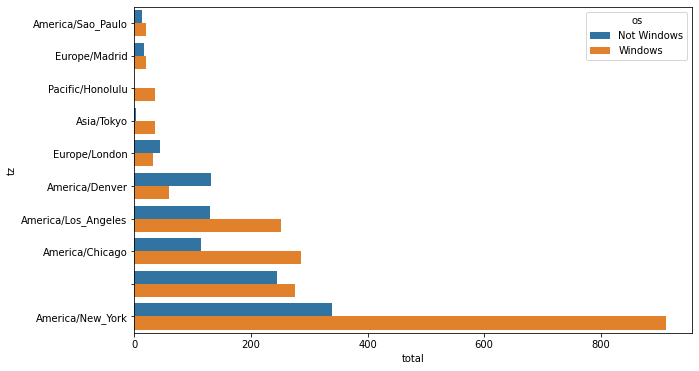

In [54]:
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

In [55]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

In [56]:
results[:4]

tz           os  total  normed_total
0  America/Sao_Paulo  Not Windows   13.0      0.393939
1  America/Sao_Paulo      Windows   20.0      0.606061
2      Europe/Madrid  Not Windows   16.0      0.457143
3      Europe/Madrid      Windows   19.0      0.542857

In [57]:
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

In [58]:
g = count_subset.groupby("tz")
g

In [59]:
g["total"].transform("sum")[:4]

0    33.0
1    33.0
2    35.0
3    35.0
Name: total, dtype: float64

In [60]:
results2 = count_subset["total"] / g["total"].transform("sum")
results2[:4]

0    0.393939
1    0.606061
2    0.457143
3    0.542857
Name: total, dtype: float64

In [61]:
pd.options.display.max_rows = 10

In [62]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::",
                      header=None, names=unames)

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames)

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames)

C:\Users\Ivo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [63]:
users.head(5)

user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455

In [64]:
ratings.head(5)

user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [65]:
movies.head(5)

movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [66]:
ratings

user_id  movie_id  rating  timestamp
0              1      1193       5  978300760
1              1       661       3  978302109
2              1       914       3  978301968
3              1      3408       4  978300275
4              1      2355       5  978824291
...          ...       ...     ...        ...
1000204     6040      1091       1  956716541
1000205     6040      1094       5  956704887
1000206     6040       562       5  956704746
1000207     6040      1096       4  956715648
1000208     6040      1097       4  956715569

[1000209 rows x 4 columns]

In [67]:
data = pd.merge(pd.merge(ratings, users), movies)
data

user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0              1      1193       5  978300760      F    1          10  48067   
1              2      1193       5  978298413      M   56          16  70072   
2             12      1193       4  978220179      M   25          12  32793   
3             15      1193       4  978199279      M   25           7  22903   
4             17      1193       5  978158471      M   50           1  95350   
...          ...       ...     ...        ...    ...  ...         ...    ...   
1000204     5949      2198       5  958846401      M   18          17  47901   
1000205     5675      2703       3  976029116      M   35          14  30030   
1000206     5780      2845       1  958153068      M   18          17  92886   
1000207     5851      3607       5  957756608      F   18          20  55410   
1000208     5938      2909       4  957273353      M   25           1  35401   

                                               title                genres  
0             One Flew Over the Cuckoo's Nest (1975)                 Drama  
1             One Flew Over the Cuckoo's Nest (1975)                 Drama  
2             One Flew Over the Cuckoo's Nest (1975)                 Drama  
3             One Flew Over the Cuckoo's Nest (1975)                 Drama  
4             One Flew Over the Cuckoo's Nest (1975)                 Drama  
...                                              ...                   ...  
1000204                           Modulations (1998)           Documentary  
1000205                        Broken Vessels (1998)                 Drama  
1000206                            White Boys (1999)                 Drama  
1000207                     One Little Indian (1973)  Comedy|Drama|Western  
1000208  Five Wives, Three Secretaries and Me (1998)           Documentary  

[1000209 rows x 10 columns]

In [68]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [69]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

In [70]:
ratings_by_title = data.groupby("title").size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [71]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [72]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender                                    F         M
title                                                
'burbs, The (1989)                 2.793478  2.962085
10 Things I Hate About You (1999)  3.646552  3.311966
101 Dalmatians (1961)              3.791444  3.500000
101 Dalmatians (1996)              3.240000  2.911215
12 Angry Men (1957)                4.184397  4.328421
...                                     ...       ...
Young Guns (1988)                  3.371795  3.425620
Young Guns II (1990)               2.934783  2.904025
Young Sherlock Holmes (1985)       3.514706  3.363344
Zero Effect (1998)                 3.864407  3.723140
eXistenZ (1999)                    3.098592  3.289086

[1216 rows x 2 columns]

In [73]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings[:10]

gender                                                         F         M
title                                                                     
Close Shave, A (1995)                                   4.644444  4.473795
Wrong Trousers, The (1993)                              4.588235  4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)           4.572650  4.464589
Wallace & Gromit: The Best of Aardman Animation (1996)  4.563107  4.385075
Schindler's List (1993)                                 4.562602  4.491415
Shawshank Redemption, The (1994)                        4.539075  4.560625
Grand Day Out, A (1992)                                 4.537879  4.293255
To Kill a Mockingbird (1962)                            4.536667  4.372611
Creature Comforts (1990)                                4.513889  4.272277
Usual Suspects, The (1995)                              4.513317  4.518248

In [74]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]
mean_ratings[:4]

gender                                    F         M      diff
title                                                          
'burbs, The (1989)                 2.793478  2.962085  0.168607
10 Things I Hate About You (1999)  3.646552  3.311966 -0.334586
101 Dalmatians (1961)              3.791444  3.500000 -0.291444
101 Dalmatians (1996)              3.240000  2.911215 -0.328785

In [75]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff[:10]

gender                                        F         M      diff
title                                                              
Dirty Dancing (1987)                   3.790378  2.959596 -0.830782
Jumpin' Jack Flash (1986)              3.254717  2.578358 -0.676359
Grease (1978)                          3.975265  3.367041 -0.608224
Little Women (1994)                    3.870588  3.321739 -0.548849
Steel Magnolias (1989)                 3.901734  3.365957 -0.535777
Anastasia (1997)                       3.800000  3.281609 -0.518391
Rocky Horror Picture Show, The (1975)  3.673016  3.160131 -0.512885
Color Purple, The (1985)               4.158192  3.659341 -0.498851
Age of Innocence, The (1993)           3.827068  3.339506 -0.487561
Free Willy (1993)                      2.921348  2.438776 -0.482573

In [76]:
len(sorted_by_diff)

1216

In [77]:
sorted_by_diff[::-1][:10]

gender                                         F         M      diff
title                                                               
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300  0.726351
Kentucky Fried Movie, The (1977)        2.878788  3.555147  0.676359
Dumb & Dumber (1994)                    2.697987  3.336595  0.638608
Longest Day, The (1962)                 3.411765  4.031447  0.619682
Cable Guy, The (1996)                   2.250000  2.863787  0.613787
Evil Dead II (Dead By Dawn) (1987)      3.297297  3.909283  0.611985
Hidden, The (1987)                      3.137931  3.745098  0.607167
Rocky III (1982)                        2.361702  2.943503  0.581801
Caddyshack (1980)                       3.396135  3.969737  0.573602
For a Few Dollars More (1965)           3.409091  3.953795  0.544704

In [78]:
data.groupby("title")["rating"]

In [79]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title

title
$1,000,000 Duck (1971)                        1.092563
'Night Mother (1986)                          1.118636
'Til There Was You (1997)                     1.020159
'burbs, The (1989)                            1.107760
...And Justice for All (1979)                 0.878110
                                                ...   
Zed & Two Noughts, A (1985)                   1.052794
Zero Effect (1998)                            1.042932
Zero Kelvin (Kjærlighetens kjøtere) (1995)    0.707107
Zeus and Roxanne (1997)                       1.122884
eXistenZ (1999)                               1.178568
Name: rating, Length: 3706, dtype: float64

In [80]:
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [81]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [82]:
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])
names1880

name sex  births
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]

In [83]:
names1880.groupby("sex")["births"].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [84]:
years = range(1880, 2011)

pieces = []
columns = ["name", "sex", "births"]

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame["year"] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

In [85]:
names

name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1690779    Zymaire   M       5  2010
1690780     Zyonne   M       5  2010
1690781  Zyquarius   M       5  2010
1690782      Zyran   M       5  2010
1690783      Zzyzx   M       5  2010

[1690784 rows x 4 columns]

In [86]:
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()

sex         F        M
year                  
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382

<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

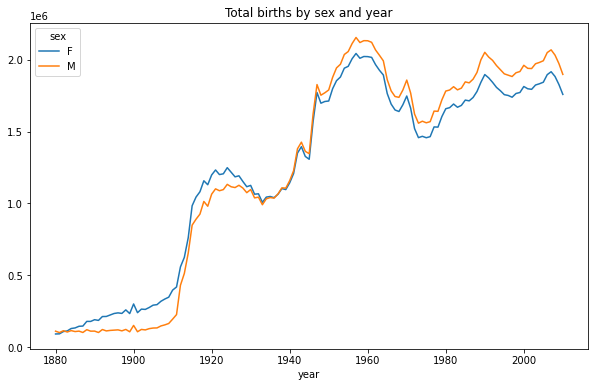

In [87]:
total_births.plot(title="Total births by sex and year")

In [88]:
total_births.iplot(kind='lines', title="Total births by sex and year")

In [89]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group

In [90]:
names = names.groupby(["year", "sex"]).apply(add_prop)
names

name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
...            ...  ..     ...   ...       ...
1690779    Zymaire   M       5  2010  0.000003
1690780     Zyonne   M       5  2010  0.000003
1690781  Zyquarius   M       5  2010  0.000003
1690782      Zyran   M       5  2010  0.000003
1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

In [91]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [92]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]

In [93]:
grouped = names.groupby(["year", "sex"])
grouped

In [94]:
top1000 = grouped.apply(get_top1000)
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [95]:
top1000.reset_index(inplace=True, drop=True)

In [96]:
top1000

name sex  births  year      prop
0            Mary   F    7065  1880  0.077643
1            Anna   F    2604  1880  0.028618
2            Emma   F    2003  1880  0.022013
3       Elizabeth   F    1939  1880  0.021309
4          Minnie   F    1746  1880  0.019188
...           ...  ..     ...   ...       ...
261872     Camilo   M     194  2010  0.000102
261873     Destin   M     194  2010  0.000102
261874     Jaquan   M     194  2010  0.000102
261875     Jaydan   M     194  2010  0.000102
261876     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [97]:
pieces=[]
for year, group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [98]:
top1000

name sex  births  year      prop
0            Mary   F    7065  1880  0.077643
1            Anna   F    2604  1880  0.028618
2            Emma   F    2003  1880  0.022013
3       Elizabeth   F    1939  1880  0.021309
4          Minnie   F    1746  1880  0.019188
...           ...  ..     ...   ...       ...
261872     Camilo   M     194  2010  0.000102
261873     Destin   M     194  2010  0.000102
261874     Jaquan   M     194  2010  0.000102
261875     Jaydan   M     194  2010  0.000102
261876     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [99]:
boys = top1000[top1000["sex"] == "M"]
boys

name sex  births  year      prop
942        John   M    9655  1880  0.087381
943     William   M    9533  1880  0.086277
944       James   M    5927  1880  0.053641
945     Charles   M    5348  1880  0.048401
946      George   M    5126  1880  0.046392
...         ...  ..     ...   ...       ...
261872   Camilo   M     194  2010  0.000102
261873   Destin   M     194  2010  0.000102
261874   Jaquan   M     194  2010  0.000102
261875   Jaydan   M     194  2010  0.000102
261876   Maxton   M     193  2010  0.000102

[130997 rows x 5 columns]

In [100]:
girls = top1000[top1000["sex"] == "F"]
girls

name sex  births  year      prop
0            Mary   F    7065  1880  0.077643
1            Anna   F    2604  1880  0.028618
2            Emma   F    2003  1880  0.022013
3       Elizabeth   F    1939  1880  0.021309
4          Minnie   F    1746  1880  0.019188
...           ...  ..     ...   ...       ...
260872    Violeta   F     250  2010  0.000142
260873     Leilah   F     250  2010  0.000142
260874    Alaysia   F     250  2010  0.000142
260875      Dania   F     249  2010  0.000142
260876     Yadira   F     249  2010  0.000142

[130880 rows x 5 columns]

In [101]:
total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

In [102]:
type(total_births)

pandas.core.frame.DataFrame

In [103]:
total_births.head(4)

name  Aaden  Aaliyah  Aarav  Aaron  Aarush  Ab  Abagail  Abb  Abbey  Abbie  \
year                                                                         
1880    NaN      NaN    NaN  102.0     NaN NaN      NaN  NaN    NaN   71.0   
1881    NaN      NaN    NaN   94.0     NaN NaN      NaN  NaN    NaN   81.0   
1882    NaN      NaN    NaN   85.0     NaN NaN      NaN  NaN    NaN   80.0   
1883    NaN      NaN    NaN  105.0     NaN NaN      NaN  NaN    NaN   79.0   

name  ...  Zoa   Zoe  Zoey  Zoie  Zola  Zollie  Zona  Zora  Zula  Zuri  
year  ...                                                               
1880  ...  8.0  23.0   NaN   NaN   7.0     NaN   8.0  28.0  27.0   NaN  
1881  ...  NaN  22.0   NaN   NaN  10.0     NaN   9.0  21.0  27.0   NaN  
1882  ...  8.0  25.0   NaN   NaN   9.0     NaN  17.0  32.0  21.0   NaN  
1883  ...  NaN  23.0   NaN   NaN  10.0     NaN  11.0  35.0  25.0   NaN  

[4 rows x 6868 columns]

In [104]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [105]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset

name     John   Harry    Mary  Marilyn
year                                  
1880   9701.0  2158.0  7092.0      NaN
1881   8795.0  2002.0  6948.0      NaN
1882   9597.0  2246.0  8179.0      NaN
1883   8934.0  2116.0  8044.0      NaN
1884   9427.0  2338.0  9253.0      NaN
...       ...     ...     ...      ...
2006  15140.0   414.0  4073.0    596.0
2007  14405.0   443.0  3665.0    597.0
2008  13273.0   379.0  3478.0    543.0
2009  12048.0   383.0  3132.0    519.0
2010  11424.0   363.0  2826.0    531.0

[131 rows x 4 columns]

In [106]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

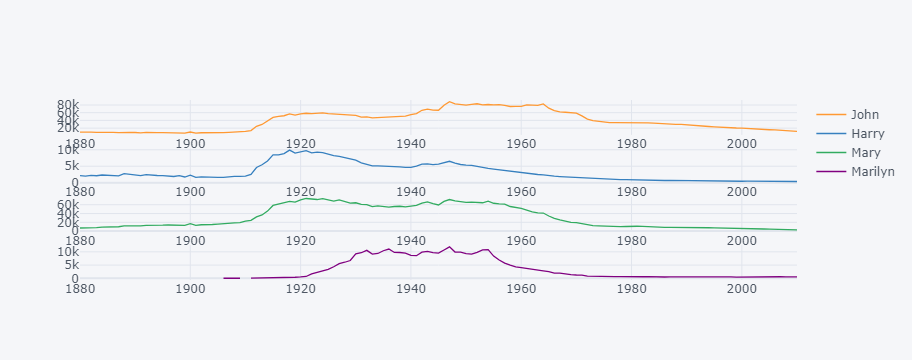

In [107]:
subset.iplot(kind='line', subplots=True, shape=(4,1))

In [108]:
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)

In [109]:
table

sex          F         M
year                    
1880  1.000000  0.997375
1881  1.000000  1.000000
1882  0.998702  0.995646
1883  0.997596  0.998566
1884  0.993156  0.994539
...        ...       ...
2006  0.753153  0.860368
2007  0.745959  0.855159
2008  0.740933  0.850003
2009  0.737290  0.845256
2010  0.736780  0.843156

[131 rows x 2 columns]

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

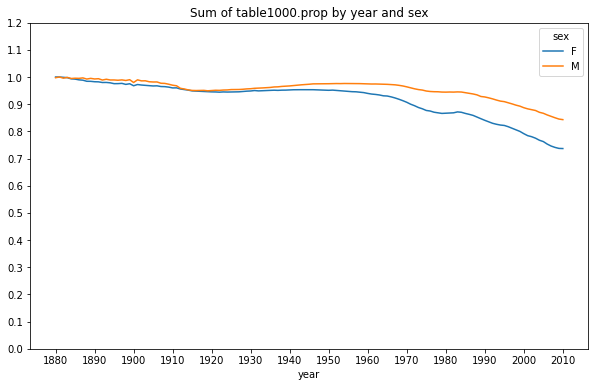

In [110]:
table.plot(title="Sum of table1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020,10))

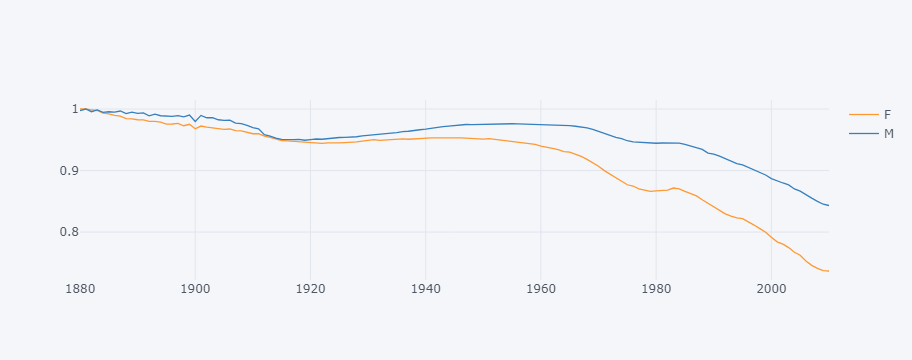

In [111]:
table.iplot(kind='line', size=range(1880, 2020,10))

In [112]:
df = boys[boys["year"] == 2010]
df

name sex  births  year      prop
260877    Jacob   M   21875  2010  0.011523
260878    Ethan   M   17866  2010  0.009411
260879  Michael   M   17133  2010  0.009025
260880   Jayden   M   17030  2010  0.008971
260881  William   M   16870  2010  0.008887
...         ...  ..     ...   ...       ...
261872   Camilo   M     194  2010  0.000102
261873   Destin   M     194  2010  0.000102
261874   Jaquan   M     194  2010  0.000102
261875   Jaydan   M     194  2010  0.000102
261876   Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [113]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [114]:
prop_cumsum.searchsorted(0.5)

116

In [115]:
prop_cumsum.values.searchsorted(0.5)

116

In [116]:
df = boys[boys.year == 1900]
df

name sex  births  year      prop
40877      John   M    9834  1900  0.065319
40878   William   M    8580  1900  0.056990
40879     James   M    7246  1900  0.048129
40880    George   M    5405  1900  0.035901
40881   Charles   M    4102  1900  0.027246
...         ...  ..     ...   ...       ...
41872    Theron   M       8  1900  0.000053
41873   Terrell   M       8  1900  0.000053
41874     Solon   M       8  1900  0.000053
41875  Rayfield   M       8  1900  0.000053
41876  Sinclair   M       8  1900  0.000053

[1000 rows x 5 columns]

In [117]:
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900

40877    0.065319
40878    0.122308
40879    0.170437
40880    0.206338
40881    0.233584
           ...   
41848    0.979489
41847    0.979542
41846    0.979595
41845    0.979648
41876    0.979702
Name: prop, Length: 1000, dtype: float64

In [118]:
in1900.searchsorted(0.5) + 1

25

In [119]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

In [120]:
diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [121]:
diversity = diversity.unstack('sex')
diversity

sex     F    M
year          
1880   38   14
1881   38   14
1882   38   15
1883   39   15
1884   39   16
...   ...  ...
2006  209   99
2007  223  103
2008  234  109
2009  241  114
2010  246  117

[131 rows x 2 columns]

In [122]:
diversity.plot(title="Number of popular names in top 50%")

<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

In [123]:
import plotly.express as px 

In [124]:
diversity.iplot(kind='lines', title="Number of popular names in top 50%")

In [125]:
get_last_letter = lambda x: x[-1]

In [126]:
names["name"].head(4)

0         Mary
1         Anna
2         Emma
3    Elizabeth
Name: name, dtype: object

In [127]:
last_letters = names["name"].map(get_last_letter)
last_letters.head(4)

0    y
1    a
2    a
3    h
Name: name, dtype: object

In [128]:
last_letters.name = "last_letter"
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [129]:
table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)
table.head(4)

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   

sex                                     ...        M                    \
year            1887     1888     1889  ...     2001     2002     2003   
last_letter                             ...                              
a            48942.0  59442.0  58631.0  ...  39124.0  38815.0  37825.0   
b                NaN      NaN      NaN  ...  50950.0  49284.0  48065.0   
c                NaN      NaN      NaN  ...  27113.0  27238.0  27697.0   
d             1027.0   1298.0   1374.0  ...  60838.0  55829.0  53391.0   

sex                                                                         
year            2004     2005     2006     2007     2008     2009     2010  
last_letter                                                                 
a            38650.0  36838.0  36156.0  34654.0  32901.0  31430.0  28438.0  
b            45914.0  43144.0  42600.0  42123.0  39945.0  38862.0  38859.0  
c            26778.0  26078.0  26635.0  26864.0  25318.0  24048.0  23125.0  
d            51754.0  50670.0  51410.0  50595.0  47910.0  46172.0  44398.0  

[4 rows x 262 columns]

In [130]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [131]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [132]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

In [133]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)
plt.subplots_adjust(hspace=0.25)

In [134]:
letter_prop.iplot(kind='bar', subplots=True)

In [135]:
letter_prop = table / table.sum()
letter_prop.head(4)

sex                 F                                                   \
year             1880      1881      1882      1883     1884      1885   
last_letter                                                              
a            0.345587  0.343440  0.338764  0.341251  0.33855  0.341270   
b                 NaN       NaN       NaN       NaN      NaN       NaN   
c                 NaN       NaN  0.000046  0.000045      NaN       NaN   
d            0.006693  0.006601  0.006806  0.007211  0.00710  0.006478   

sex                                                  ...         M            \
year             1886      1887      1888      1889  ...      2001      2002   
last_letter                                          ...                       
a            0.339703  0.335258  0.332764  0.328706  ...  0.020162  0.020019   
b                 NaN       NaN       NaN       NaN  ...  0.026256  0.025418   
c                 NaN       NaN       NaN       NaN  ...  0.013972  0.014048   
d            0.006967  0.007035  0.007266  0.007703  ...  0.031352  0.028794   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a            0.019177  0.019505  0.018481  0.017635  0.016747  0.016189   
b            0.024368  0.023171  0.021645  0.020778  0.020357  0.019655   
c            0.014042  0.013514  0.013083  0.012991  0.012983  0.012458   
d            0.027069  0.026118  0.025420  0.025075  0.024451  0.023574   

sex                              
year             2009      2010  
last_letter                      
a            0.015927  0.014980  
b            0.019693  0.020470  
c            0.012186  0.012181  
d            0.023398  0.023387  

[4 rows x 262 columns]

In [136]:
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

last_letter         d         n         y
year                                     
1880         0.083055  0.153213  0.075760
1881         0.083247  0.153214  0.077451
1882         0.085340  0.149560  0.077537
1883         0.084066  0.151646  0.079144
1884         0.086120  0.149915  0.080405

<AxesSubplot:xlabel='year'>

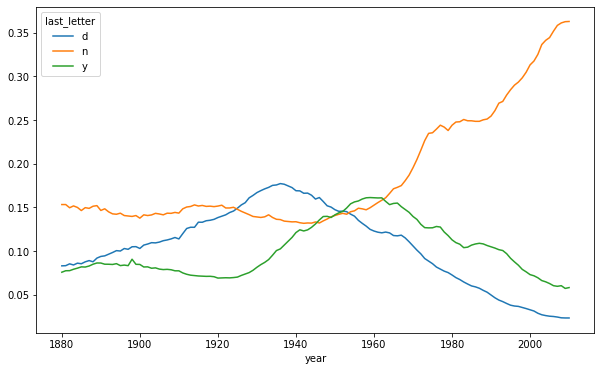

In [137]:
dny_ts.plot()

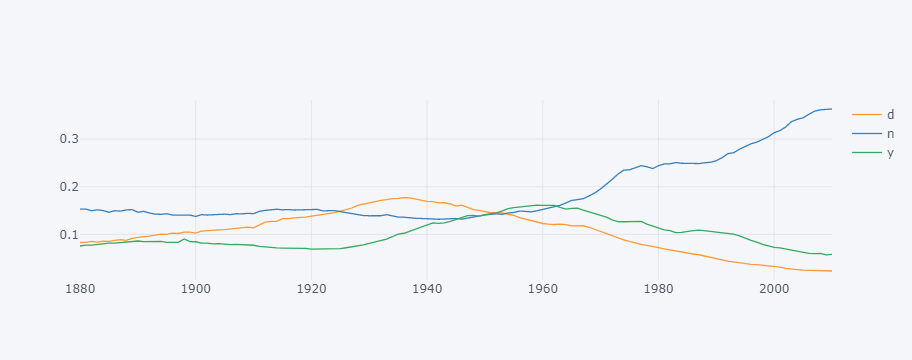

In [138]:
dny_ts.iplot(kind='lines', theme='pearl')

In [139]:
all_names = pd.Series(top1000["name"].unique())
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6863        Masen
6864        Rowen
6865       Yousef
6866       Joziah
6867       Maxton
Length: 6868, dtype: object

In [140]:
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [141]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered

name sex  births  year      prop
632     Leslie   F       8  1880  0.000088
1108    Leslie   M      79  1880  0.000715
2462    Leslie   F      11  1881  0.000120
3014    Leslie   M      92  1881  0.000913
4512    Leslie   F       9  1882  0.000083
...        ...  ..     ...   ...       ...
256327   Lesly   F     699  2008  0.000371
258036  Leslie   F    1975  2009  0.001081
258378   Lesly   F     598  2009  0.000327
260073  Leslie   F    1558  2010  0.000886
260456   Lesly   F     502  2010  0.000285

[400 rows x 5 columns]

In [142]:
filtered.groupby("name")["births"].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [143]:
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table.head(4)

sex      F      M
year             
1880   8.0   79.0
1881  11.0   92.0
1882   9.0  128.0
1883   7.0  125.0

In [144]:
table = table.div(table.sum(axis="columns"), axis="index")
table.head(4)

sex          F         M
year                    
1880  0.091954  0.908046
1881  0.106796  0.893204
1882  0.065693  0.934307
1883  0.053030  0.946970

In [145]:
table.plot(style={"M": "k-", "F": "k--"})

<AxesSubplot:xlabel='year'>

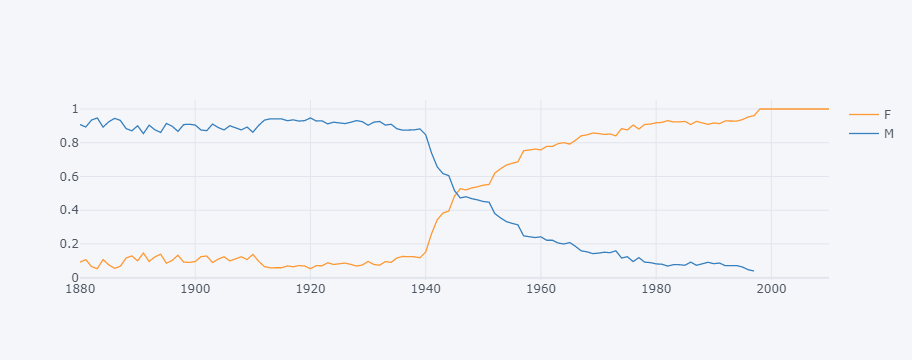

In [146]:
table.iplot(kind='line')

In [147]:
import json
db = json.load(open("datasets/usda_food/database.json"))

In [148]:
len(db)

6636

In [149]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [150]:
db[0]["nutrients"][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [151]:
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

value units                  description        group
0    25.18     g                      Protein  Composition
1    29.20     g            Total lipid (fat)  Composition
2     3.06     g  Carbohydrate, by difference  Composition
3     3.28     g                          Ash        Other
4   376.00  kcal                       Energy       Energy
5    39.28     g                        Water  Composition
6  1573.00    kJ                       Energy       Energy

In [152]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)

In [153]:
info.head()

description                   group    id  \
0                     Cheese, caraway  Dairy and Egg Products  1008   
1                     Cheese, cheddar  Dairy and Egg Products  1009   
2                        Cheese, edam  Dairy and Egg Products  1018   
3                        Cheese, feta  Dairy and Egg Products  1019   
4  Cheese, mozzarella, part skim milk  Dairy and Egg Products  1028   

  manufacturer  
0               
1               
2               
3               
4

In [154]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [155]:
pd.value_counts(info["group"])[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [156]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [157]:
pd.options.display.max_rows = 6

In [158]:
nutrients

value units                         description        group     id
0       25.180     g                             Protein  Composition   1008
1       29.200     g                   Total lipid (fat)  Composition   1008
2        3.060     g         Carbohydrate, by difference  Composition   1008
...        ...   ...                                 ...          ...    ...
389352   0.072     g        Fatty acids, total saturated        Other  43546
389353   0.028     g  Fatty acids, total monounsaturated        Other  43546
389354   0.041     g  Fatty acids, total polyunsaturated        Other  43546

[389355 rows x 5 columns]

In [159]:
nutrients.duplicated().sum()

14179

In [160]:
nutrients = nutrients.drop_duplicates()
nutrients

value units                         description        group     id
0       25.180     g                             Protein  Composition   1008
1       29.200     g                   Total lipid (fat)  Composition   1008
2        3.060     g         Carbohydrate, by difference  Composition   1008
...        ...   ...                                 ...          ...    ...
389352   0.072     g        Fatty acids, total saturated        Other  43546
389353   0.028     g  Fatty acids, total monounsaturated        Other  43546
389354   0.041     g  Fatty acids, total polyunsaturated        Other  43546

[375176 rows x 5 columns]

In [161]:
col_mapping = {"description" : "food",
               "group"       : "fgroup"}

In [162]:
info = info.rename(columns=col_mapping, copy=False)

In [163]:
info

food                  fgroup  \
0                                Cheese, caraway  Dairy and Egg Products   
1                                Cheese, cheddar  Dairy and Egg Products   
2                                   Cheese, edam  Dairy and Egg Products   
...                                          ...                     ...   
6633                       Babyfood, juice, pear              Baby Foods   
6634  Babyfood, dessert, banana yogurt, strained              Baby Foods   
6635       Babyfood, banana no tapioca, strained              Baby Foods   

         id manufacturer  
0      1008               
1      1009               
2      1018               
...     ...          ...  
6633  43408         None  
6634  43539         None  
6635  43546         None  

[6636 rows x 4 columns]

In [164]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [165]:
col_mapping = {"description" : "nutrient",
               "group" : "nutgroup"}

In [166]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

value units                            nutrient     nutgroup     id
0       25.180     g                             Protein  Composition   1008
1       29.200     g                   Total lipid (fat)  Composition   1008
2        3.060     g         Carbohydrate, by difference  Composition   1008
...        ...   ...                                 ...          ...    ...
389352   0.072     g        Fatty acids, total saturated        Other  43546
389353   0.028     g  Fatty acids, total monounsaturated        Other  43546
389354   0.041     g  Fatty acids, total polyunsaturated        Other  43546

[375176 rows x 5 columns]

In [167]:
ndata = pd.merge(nutrients, info, on="id")
ndata

value units                            nutrient     nutgroup     id  \
0       25.180     g                             Protein  Composition   1008   
1       29.200     g                   Total lipid (fat)  Composition   1008   
2        3.060     g         Carbohydrate, by difference  Composition   1008   
...        ...   ...                                 ...          ...    ...   
375173   0.072     g        Fatty acids, total saturated        Other  43546   
375174   0.028     g  Fatty acids, total monounsaturated        Other  43546   
375175   0.041     g  Fatty acids, total polyunsaturated        Other  43546   

                                         food                  fgroup  \
0                             Cheese, caraway  Dairy and Egg Products   
1                             Cheese, caraway  Dairy and Egg Products   
2                             Cheese, caraway  Dairy and Egg Products   
...                                       ...                     ...   
375173  Babyfood, banana no tapioca, strained              Baby Foods   
375174  Babyfood, banana no tapioca, strained              Baby Foods   
375175  Babyfood, banana no tapioca, strained              Baby Foods   

       manufacturer  
0                    
1                    
2                    
...             ...  
375173         None  
375174         None  
375175         None  

[375176 rows x 8 columns]

In [168]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [169]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
                                 ...                  
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, Length: 8, dtype: object

In [170]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                                                        ...  
Zinc, Zn          Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

<AxesSubplot:ylabel='fgroup'>

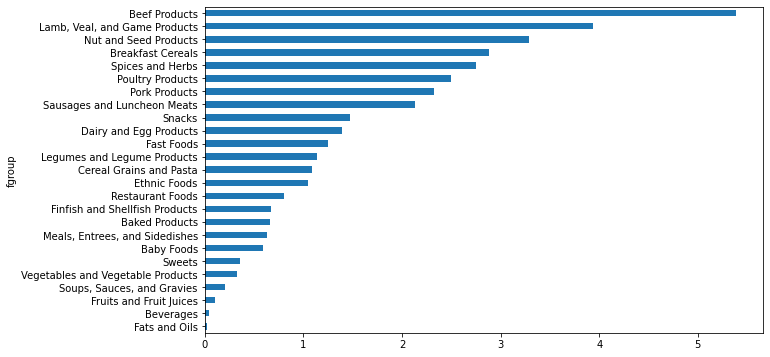

In [171]:
result["Zinc, Zn"].sort_values().plot(kind="barh")

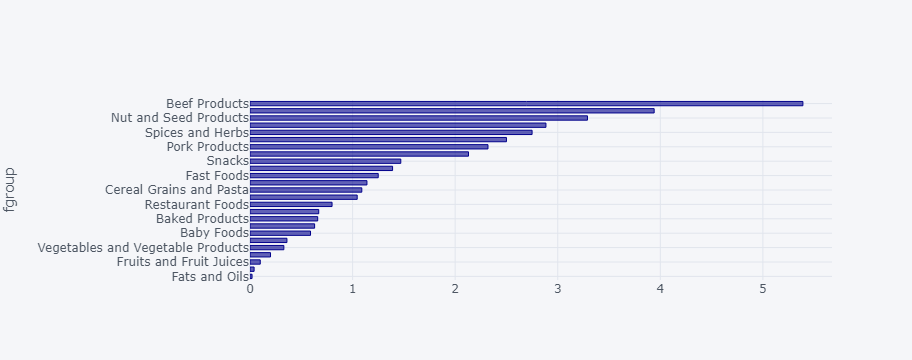

In [172]:
result["Zinc, Zn"].sort_values().iplot(kind='barh', color='darkblue', bargap=0.4, yTitle='fgroup')

In [173]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])
by_nutrient

In [174]:
get_maximum = lambda x: x.loc[x.value.idxmax()]

In [175]:
get_minimum = lambda x: x.loc[x.value.idxmin()]

In [176]:
max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]
max_foods

value  \
nutgroup    nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
...                                            ...   
Vitamins    Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                               food  
nutgroup    nutrient                                                                                 
Amino Acids Alanine                                               Gelatins, dry powder, unsweetened  
            Arginine                                                   Seeds, sesame flour, low-fat  
            Aspartic acid                                                       Soy protein isolate  
...                                                                                             ...  
Vitamins    Vitamin E (alpha-tocopherol)                                            Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Grain Cheerios  
            Vitamin K (phylloquinone)                                          Spices, sage, ground  

[94 rows x 2 columns]

In [177]:
max_foods["food"] = max_foods["food"].str[:50]
max_foods

value  \
nutgroup    nutrient                                 
Amino Acids Alanine                          8.009   
            Arginine                         7.436   
            Aspartic acid                   10.203   
...                                            ...   
Vitamins    Vitamin E (alpha-tocopherol)   149.400   
            Vitamin E, added                46.550   
            Vitamin K (phylloquinone)     1714.500   

                                                                                        food  
nutgroup    nutrient                                                                          
Amino Acids Alanine                                        Gelatins, dry powder, unsweetened  
            Arginine                                            Seeds, sesame flour, low-fat  
            Aspartic acid                                                Soy protein isolate  
...                                                                                      ...  
Vitamins    Vitamin E (alpha-tocopherol)                                     Oil, wheat germ  
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Grain C  
            Vitamin K (phylloquinone)                                   Spices, sage, ground  

[94 rows x 2 columns]

In [178]:
max_foods.loc["Amino Acids"]["food"]

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
                                        ...                        
Tryptophan         Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTERNAT
Name: food, Length: 19, dtype: object

In [179]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.head()

cmte_id    cand_id             cand_nm           contbr_nm  \
0  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
1  C00410118  P20002978  Bachmann, Michelle     HARVEY, WILLIAM   
2  C00410118  P20002978  Bachmann, Michelle       SMITH, LANIER   
3  C00410118  P20002978  Bachmann, Michelle    BLEVINS, DARONDA   
4  C00410118  P20002978  Bachmann, Michelle  WARDENBURG, HAROLD   

          contbr_city contbr_st contbr_zip        contbr_employer  \
0              MOBILE        AL  366010290                RETIRED   
1              MOBILE        AL  366010290                RETIRED   
2              LANETT        AL  368633403  INFORMATION REQUESTED   
3             PIGGOTT        AR  724548253                   NONE   
4  HOT SPRINGS NATION        AR  719016467                   NONE   

       contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc  \
0                RETIRED              250.0        20-JUN-11          NaN   
1                RETIRED               50.0        23-JUN-11          NaN   
2  INFORMATION REQUESTED              250.0        05-JUL-11          NaN   
3                RETIRED              250.0        01-AUG-11          NaN   
4                RETIRED              300.0        20-JUN-11          NaN   

  memo_cd memo_text form_tp  file_num  
0     NaN       NaN   SA17A    736166  
1     NaN       NaN   SA17A    736166  
2     NaN       NaN   SA17A    749073  
3     NaN       NaN   SA17A    749073  
4     NaN       NaN   SA17A    736166

In [180]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [181]:
fec.iloc[123456]

cmte_id          C00431445
cand_id          P80003338
cand_nm      Obama, Barack
                 ...      
memo_text              NaN
form_tp              SA17A
file_num            772372
Name: 123456, Length: 16, dtype: object

In [182]:
unique_cands = fec["cand_nm"].unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [183]:
unique_cands[2]

'Obama, Barack'

In [184]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

In [185]:
fec["cand_nm"][123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [186]:
fec["cand_nm"][123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [187]:
fec["party"] = fec["cand_nm"].map(parties)
fec["party"]

0          Republican
1          Republican
2          Republican
              ...    
1001728    Republican
1001729    Republican
1001730    Republican
Name: party, Length: 1001731, dtype: object

In [188]:
fec["party"].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [189]:
(fec["contb_receipt_amt"] > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [190]:
fec = fec[fec["contb_receipt_amt"] > 0]
fec

cmte_id    cand_id             cand_nm               contbr_nm  \
0        C00410118  P20002978  Bachmann, Michelle         HARVEY, WILLIAM   
1        C00410118  P20002978  Bachmann, Michelle         HARVEY, WILLIAM   
2        C00410118  P20002978  Bachmann, Michelle           SMITH, LANIER   
...            ...        ...                 ...                     ...   
1001728  C00500587  P20003281         Perry, Rick     GRANE, BRYAN F. MR.   
1001729  C00500587  P20003281         Perry, Rick      TOLBERT, DARYL MR.   
1001730  C00500587  P20003281         Perry, Rick  ANDERSON, MARILEE MRS.   

            contbr_city contbr_st contbr_zip  \
0                MOBILE        AL  366010290   
1                MOBILE        AL  366010290   
2                LANETT        AL  368633403   
...                 ...       ...        ...   
1001728  INFO REQUESTED        XX      99999   
1001729  INFO REQUESTED        XX      99999   
1001730  INFO REQUESTED        XX      99999   

                                contbr_employer  \
0                                       RETIRED   
1                                       RETIRED   
2                         INFORMATION REQUESTED   
...                                         ...   
1001728  INFORMATION REQUESTED PER BEST EFFORTS   
1001729                                T.A.C.C.   
1001730  INFORMATION REQUESTED PER BEST EFFORTS   

                              contbr_occupation  contb_receipt_amt  \
0                                       RETIRED              250.0   
1                                       RETIRED               50.0   
2                         INFORMATION REQUESTED              250.0   
...                                         ...                ...   
1001728  INFORMATION REQUESTED PER BEST EFFORTS              500.0   
1001729            LONGWALL MAINTENANCE FOREMAN              500.0   
1001730  INFORMATION REQUESTED PER BEST EFFORTS             2500.0   

        contb_receipt_dt receipt_desc memo_cd memo_text form_tp  file_num  \
0              20-JUN-11          NaN     NaN       NaN   SA17A    736166   
1              23-JUN-11          NaN     NaN       NaN   SA17A    736166   
2              05-JUL-11          NaN     NaN       NaN   SA17A    749073   
...                  ...          ...     ...       ...     ...       ...   
1001728        29-SEP-11          NaN     NaN       NaN   SA17A    751678   
1001729        30-SEP-11          NaN     NaN       NaN   SA17A    751678   
1001730        31-AUG-11          NaN     NaN       NaN   SA17A    751678   

              party  
0        Republican  
1        Republican  
2        Republican  
...             ...  
1001728  Republican  
1001729  Republican  
1001730  Republican  

[991475 rows x 17 columns]

In [191]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]
fec_mrbo

cmte_id    cand_id        cand_nm           contbr_nm contbr_city  \
411     C00431171  P80003353   Romney, Mitt  ELDERBAUM, WILLIAM         DPO   
412     C00431171  P80003353   Romney, Mitt  ELDERBAUM, WILLIAM         DPO   
413     C00431171  P80003353   Romney, Mitt    CARLSEN, RICHARD         APO   
...           ...        ...            ...                 ...         ...   
701383  C00431445  P80003338  Obama, Barack      TUCKER, PAMELA         APO   
701384  C00431445  P80003338  Obama, Barack      MOUNTS, ROBERT         APO   
701385  C00431445  P80003338  Obama, Barack         NEAL, AMBER         APO   

       contbr_st contbr_zip                         contbr_employer  \
411           AA  340230183                           US GOVERNMENT   
412           AA  340230183                           US GOVERNMENT   
413           AE  091280020             DEFENSE INTELLIGENCE AGENCY   
...          ...        ...                                     ...   
701383        ZZ  963190030                                   DODEA   
701384        ZZ  962043077                       HQ USFK (FKDC-SA)   
701385        ZZ  091022065  THE DEPARTMENT OF DEFENSE EDUCATION AC   

                            contbr_occupation  contb_receipt_amt  \
411                   FOREIGN SERVICE OFFICER               25.0   
412                   FOREIGN SERVICE OFFICER              110.0   
413                      INTELLIGENCE ANALYST              250.0   
...                                       ...                ...   
701383                               EDUCATOR                3.0   
701384  GS-15 INTERNATIONAL RELATIONS OFFICER               25.0   
701385                                TEACHER              135.0   

       contb_receipt_dt receipt_desc memo_cd                  memo_text  \
411           01-FEB-12          NaN     NaN                        NaN   
412           01-FEB-12          NaN     NaN                        NaN   
413           13-APR-12          NaN     NaN                        NaN   
...                 ...          ...     ...                        ...   
701383        20-JAN-12          NaN     NaN                        NaN   
701384        26-APR-12          NaN     NaN                        NaN   
701385        04-SEP-11          NaN       X  * OBAMA VICTORY FUND 2012   

       form_tp  file_num       party  
411      SA17A    780124  Republican  
412      SA17A    780124  Republican  
413      SA17A    785689  Republican  
...        ...       ...         ...  
701383   SA17A    775668    Democrat  
701384   SA17A    785239    Democrat  
701385    SA18    756218    Democrat  

[694282 rows x 17 columns]

In [192]:
fec["contbr_occupation"].value_counts()[:10]

RETIRED                  233990
INFORMATION REQUESTED     35107
ATTORNEY                  34286
                          ...  
TEACHER                   13990
CONSULTANT                13273
PROFESSOR                 12555
Name: contbr_occupation, Length: 10, dtype: int64

In [193]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

In [194]:
get_occ = lambda x: occ_mapping.get(x, x)

In [195]:
fec["contbr_occupation"]

0                                         RETIRED
1                                         RETIRED
2                           INFORMATION REQUESTED
                            ...                  
1001728    INFORMATION REQUESTED PER BEST EFFORTS
1001729              LONGWALL MAINTENANCE FOREMAN
1001730    INFORMATION REQUESTED PER BEST EFFORTS
Name: contbr_occupation, Length: 991475, dtype: object

In [196]:
fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

In [197]:
fec["contbr_occupation"]

0                               RETIRED
1                               RETIRED
2                          NOT PROVIDED
                       ...             
1001728                    NOT PROVIDED
1001729    LONGWALL MAINTENANCE FOREMAN
1001730                    NOT PROVIDED
Name: contbr_occupation, Length: 991475, dtype: object

In [198]:
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

In [199]:
get_emp = lambda x: emp_mapping.get(x, x)

In [200]:
fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

In [201]:
fec["contbr_employer"] 

0               RETIRED
1               RETIRED
2          NOT PROVIDED
               ...     
1001728    NOT PROVIDED
1001729        T.A.C.C.
1001730    NOT PROVIDED
Name: contbr_employer, Length: 991475, dtype: object

In [202]:
by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
by_occupation

party                                Democrat  Republican
contbr_occupation                                        
   MIXED-MEDIA ARTIST / STORYTELLER     100.0         NaN
 AREA VICE PRESIDENT                    250.0         NaN
 RESEARCH ASSOCIATE                     100.0         NaN
...                                       ...         ...
ZOOLOGY EDUCATION                        25.0         NaN
\NONE\                                    NaN       250.0
~                                         NaN        75.0

[45064 rows x 2 columns]

In [203]:
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

party                 Democrat   Republican
contbr_occupation                          
ATTORNEY           11141982.97   7477194.43
CEO                 2074974.79   4211040.52
CONSULTANT          2459912.71   2544725.45
...                        ...          ...
REAL ESTATE          528902.09   1625902.25
RETIRED            25305116.38  23561244.49
SELF-EMPLOYED        672393.40   1640252.54

[17 rows x 2 columns]

<AxesSubplot:ylabel='contbr_occupation'>

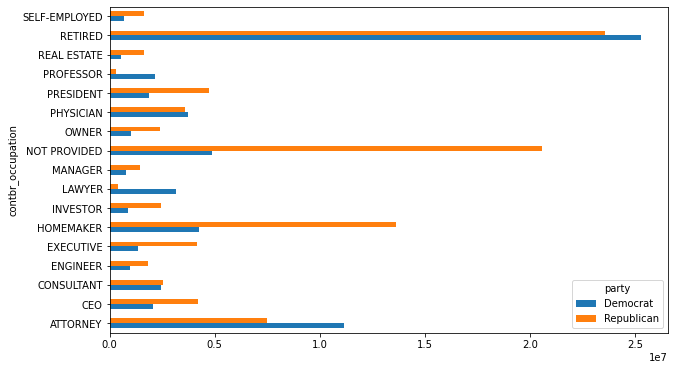

In [204]:
over_2mm.plot(kind="barh")

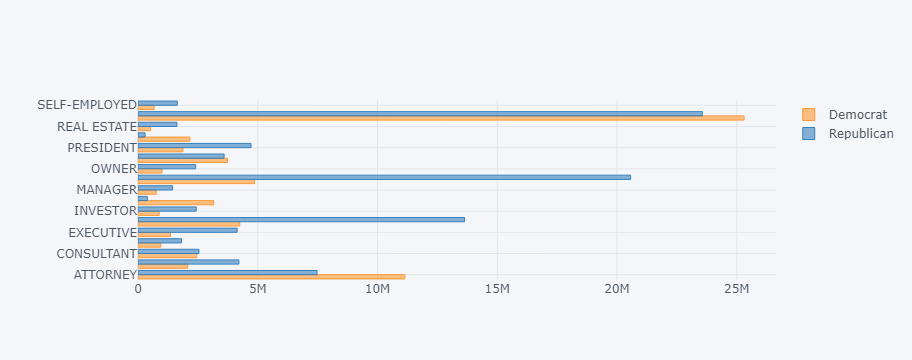

In [205]:
over_2mm.iplot(kind="barh")

In [206]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

In [207]:
grouped = fec_mrbo.groupby("cand_nm")
grouped

In [208]:
grouped.apply(get_top_amounts, "contbr_occupation", n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
                                           ...     
Romney, Mitt   PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [209]:
grouped.apply(get_top_amounts, "contbr_employer", n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694358.85
               SELF-EMPLOYED         17080985.96
               NOT EMPLOYED           8586308.70
                                        ...     
Romney, Mitt   GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL          139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

In [210]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100_000, 1_000_000, 10_000_000])

In [211]:
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
             ...     
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [212]:
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped

In [213]:
grouped.size()

cand_nm        contb_receipt_amt  
Obama, Barack  (0, 1]                    493
               (1, 10]                 40070
               (10, 100]              372280
                                       ...  
Romney, Mitt   (10000, 100000]             1
               (100000, 1000000]           0
               (1000000, 10000000]         0
Length: 16, dtype: int64

In [214]:
grouped.size().unstack()

contb_receipt_amt  (0, 1]  (1, 10]  (10, 100]  (100, 1000]  (1000, 10000]  \
cand_nm                                                                     
Obama, Barack         493    40070     372280       153991          22284   
Romney, Mitt           77     3681      31853        43357          26186   

contb_receipt_amt  (10000, 100000]  (100000, 1000000]  (1000000, 10000000]  
cand_nm                                                                     
Obama, Barack                    2                  3                    4  
Romney, Mitt                     1                  0                    0

In [215]:
grouped.size().unstack(level=0)

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                         493            77
(1, 10]                      40070          3681
(10, 100]                   372280         31853
...                            ...           ...
(10000, 100000]                  2             1
(100000, 1000000]                3             0
(1000000, 10000000]              4             0

[8 rows x 2 columns]

In [216]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
bucket_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                      318.24         77.00
(1, 10]                  337267.62      29819.66
(10, 100]              20288981.41    1987783.76
...                            ...           ...
(10000, 100000]           59100.00      12700.00
(100000, 1000000]       1490683.08          0.00
(1000000, 10000000]     7148839.76          0.00

[8 rows x 2 columns]

In [217]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"),
                              axis="index")
normed_sums

cand_nm              Obama, Barack  Romney, Mitt
contb_receipt_amt                               
(0, 1]                    0.805182      0.194818
(1, 10]                   0.918767      0.081233
(10, 100]                 0.910769      0.089231
...                            ...           ...
(10000, 100000]           0.823120      0.176880
(100000, 1000000]         1.000000      0.000000
(1000000, 10000000]       1.000000      0.000000

[8 rows x 2 columns]

<AxesSubplot:ylabel='contb_receipt_amt'>

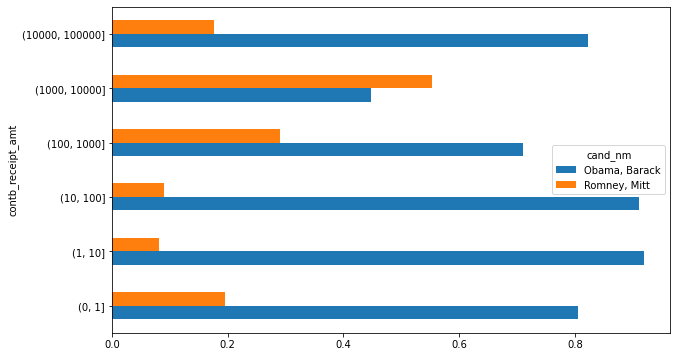

In [218]:
normed_sums[:-2].plot(kind="barh")

In [219]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
grouped

In [220]:
grouped["contb_receipt_amt"].sum()

cand_nm        contbr_st
Obama, Barack  AA            56405.00
               AB             2048.00
               AE            42973.75
                              ...    
Romney, Mitt   WV           126725.12
               WY           252595.84
               XX           400250.00
Name: contb_receipt_amt, Length: 125, dtype: float64

In [221]:
grouped["contb_receipt_amt"].sum().unstack()

contbr_st           AA      AB        AE         AK         AL       AP  \
cand_nm                                                                   
Obama, Barack  56405.0  2048.0  42973.75  281840.15  543123.48  37130.5   
Romney, Mitt     135.0     NaN   5680.00   86204.24  527303.51   1655.0   

contbr_st             AR      AS          AZ           CA  ...          UT  \
cand_nm                                                    ...               
Obama, Barack  359247.28  2955.0  1506476.98  23824984.24  ...   519851.37   
Romney, Mitt   105556.00     NaN  1888436.23  11237636.60  ...  3717300.48   

contbr_st              VA       VI         VT          WA          WI  \
cand_nm                                                                 
Obama, Barack  4259977.19  80712.0  986510.59  4250933.16  1130155.46   
Romney, Mitt   3465765.85   3500.0   55229.44  1341521.56   270316.32   

contbr_st             WV         WY        XX      ZZ  
cand_nm                                                
Obama, Barack  169154.47  194046.74       NaN  5963.0  
Romney, Mitt   126725.12  252595.84  400250.0     NaN  

[2 rows x 67 columns]

In [222]:
grouped["contb_receipt_amt"].sum().unstack(level=0)

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AA              56405.00        135.00
AB               2048.00           NaN
AE              42973.75       5680.00
...                  ...           ...
WY             194046.74     252595.84
XX                   NaN     400250.00
ZZ               5963.00           NaN

[67 rows x 2 columns]

In [223]:
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AA              56405.00        135.00
AB               2048.00          0.00
AE              42973.75       5680.00
...                  ...           ...
WY             194046.74     252595.84
XX                  0.00     400250.00
ZZ               5963.00          0.00

[67 rows x 2 columns]

In [224]:
totals[totals.sum(axis="columns") > 100000]

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK             281840.15      86204.24
AL             543123.48     527303.51
AR             359247.28     105556.00
...                  ...           ...
WV             169154.47     126725.12
WY             194046.74     252595.84
XX                  0.00     400250.00

[52 rows x 2 columns]

In [225]:
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK             281840.15      86204.24
AL             543123.48     527303.51
AR             359247.28     105556.00
...                  ...           ...
DC            4373538.80    1025137.50
DE             336669.14      82712.00
FL            7318178.58    8338458.81

[10 rows x 2 columns]

In [226]:
totals.sum(axis="columns") > 100000

contbr_st
AK    True
AL    True
AR    True
      ... 
WV    True
WY    True
XX    True
Length: 52, dtype: bool

In [227]:
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)

cand_nm    Obama, Barack  Romney, Mitt
contbr_st                             
AK              0.765778      0.234222
AL              0.507390      0.492610
AR              0.772902      0.227098
...                  ...           ...
DC              0.810113      0.189887
DE              0.802776      0.197224
FL              0.467417      0.532583

[10 rows x 2 columns]